## Predict salary

Define potential problems that can be addressed using the machine learning techniques you have learnt.  Formulate the problem in terms of supervised learning with justifications and perform activities such as preparing the dataset for analysis; investigating the relationships in the data set with visualization; creating a model; evaluating the performance of the classification model.

## Import require modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

#from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics

In [3]:
train_df = pd.read_csv("train.csv", header=None)
test_df = pd.read_csv("test.csv", header=None)
pd.set_option('display.max_columns',100)

In [4]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
train_df.shape

(32561, 15)

In [6]:
train_df.rename(columns = {0:'Age', 1:'workclass',2: 'fnlwgt',3: 'education', 4:'education-num',
                           5:'marital-status', 6: 'occupation', 7: 'relationship',8:'race', 9:'sex',
                           10:'capital-gain',11:'capital-loss',12:'hours-per-week',13:'native-country',
                           14:'salary'}, inplace = True)

test_df.rename(columns = {0:'Age', 1:'workclass',2: 'fnlwgt',3: 'education', 4:'education-num',
                           5:'marital-status', 6: 'occupation', 7: 'relationship',8:'race', 9:'sex',
                           10:'capital-gain',11:'capital-loss',12:'hours-per-week',13:'native-country',
                           14:'salary'}, inplace = True)

In [7]:
train_df.head()

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
test_df.head()

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [9]:
test_df.shape

(16281, 15)

In [10]:
train_df.shape

(32561, 15)

# checking for null values

In [11]:
#checking null values on train data
train_df.isnull().sum()

Age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [12]:
#checking null values on train data
test_df.isnull().sum()

Age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

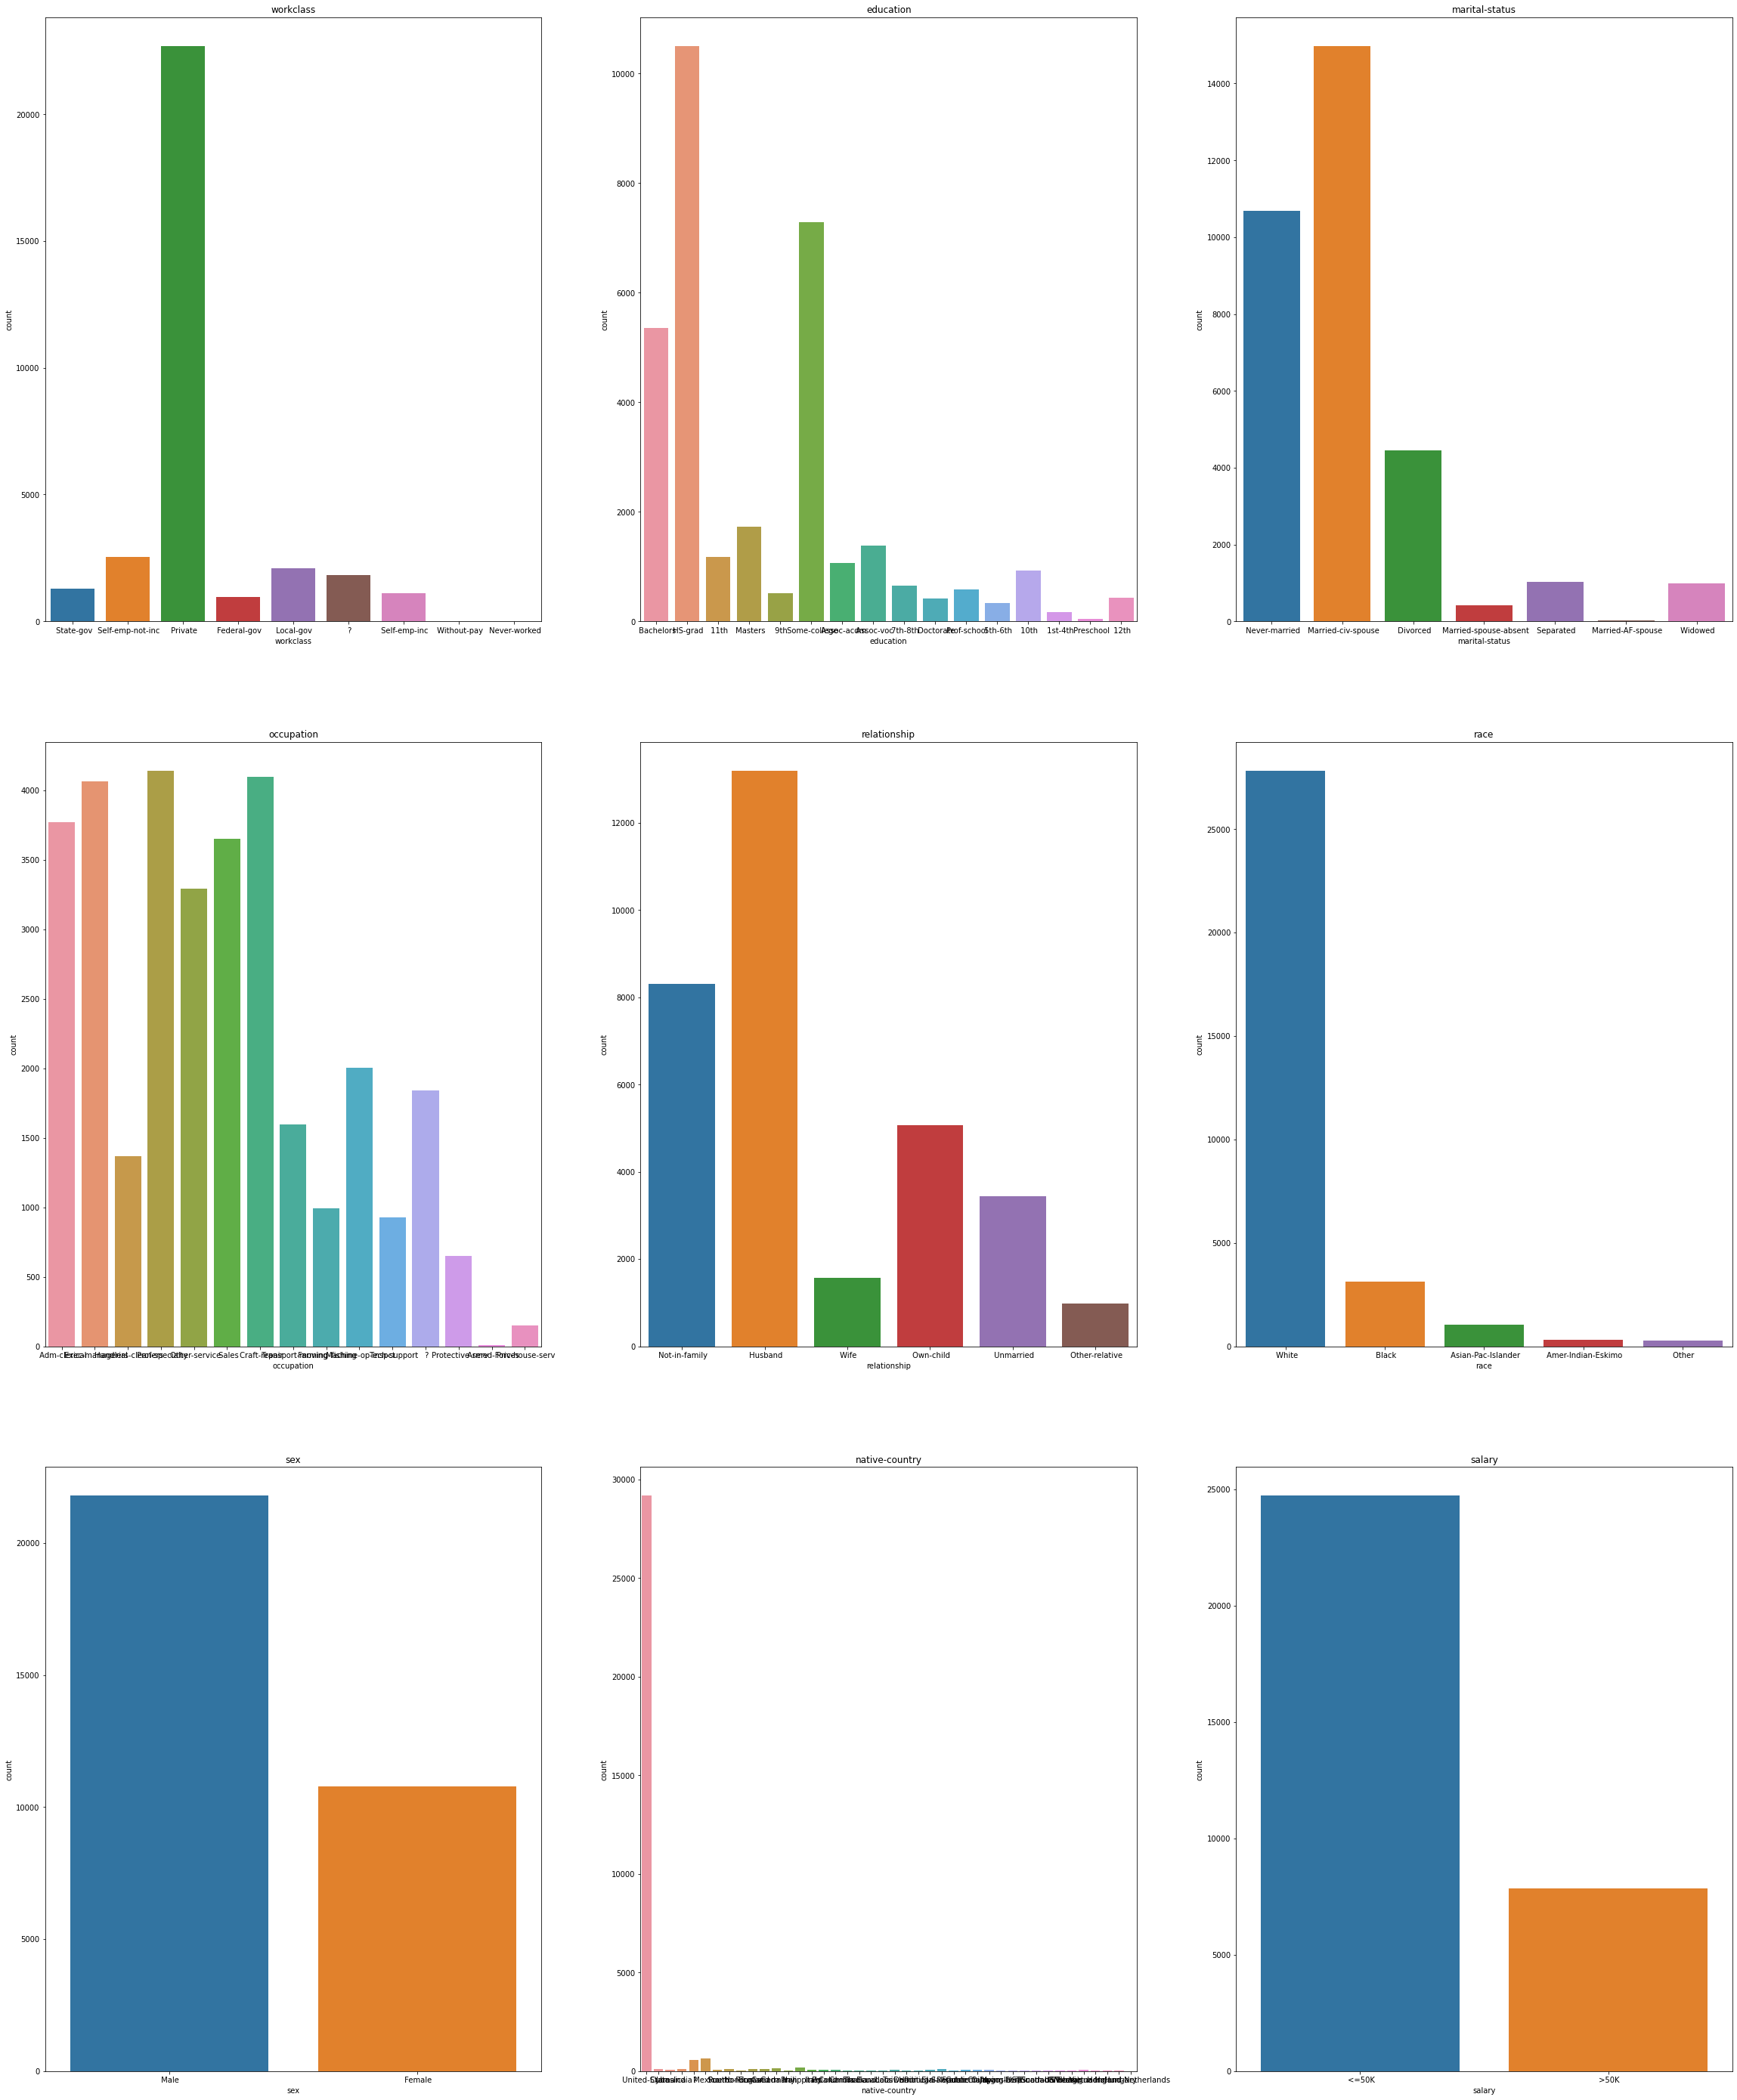

In [13]:
categorical_columns = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','salary']

#plotting count values on train data for 'workclass','education','marital-status','occupation','relationship','race','sex','native-country','salary'

plt.figure(figsize=(40,50))

plt.subplot(3,3,1)
plt.title("workclass")
sns.countplot(x='workclass', data=train_df)

plt.subplot(3,3,2)
plt.title("education")
sns.countplot(x='education', data=train_df)

plt.subplot(3,3,3)
plt.title("marital-status")
sns.countplot(x='marital-status', data=train_df)

plt.subplot(3,3,4)
plt.title("occupation")
sns.countplot(x='occupation', data=train_df)

plt.subplot(3,3,5)
plt.title("relationship")
sns.countplot(x='relationship', data=train_df)

plt.subplot(3,3,6)
plt.title("race")
sns.countplot(x='race', data=train_df)

plt.subplot(3,3,7)
plt.title("sex")
sns.countplot(x='sex', data=train_df)

plt.subplot(3,3,8)
plt.title("native-country")
sns.countplot(x='native-country', data=train_df)

plt.subplot(3,3,9)
plt.title("salary")
sns.countplot(x='salary', data=train_df)

plt.show()

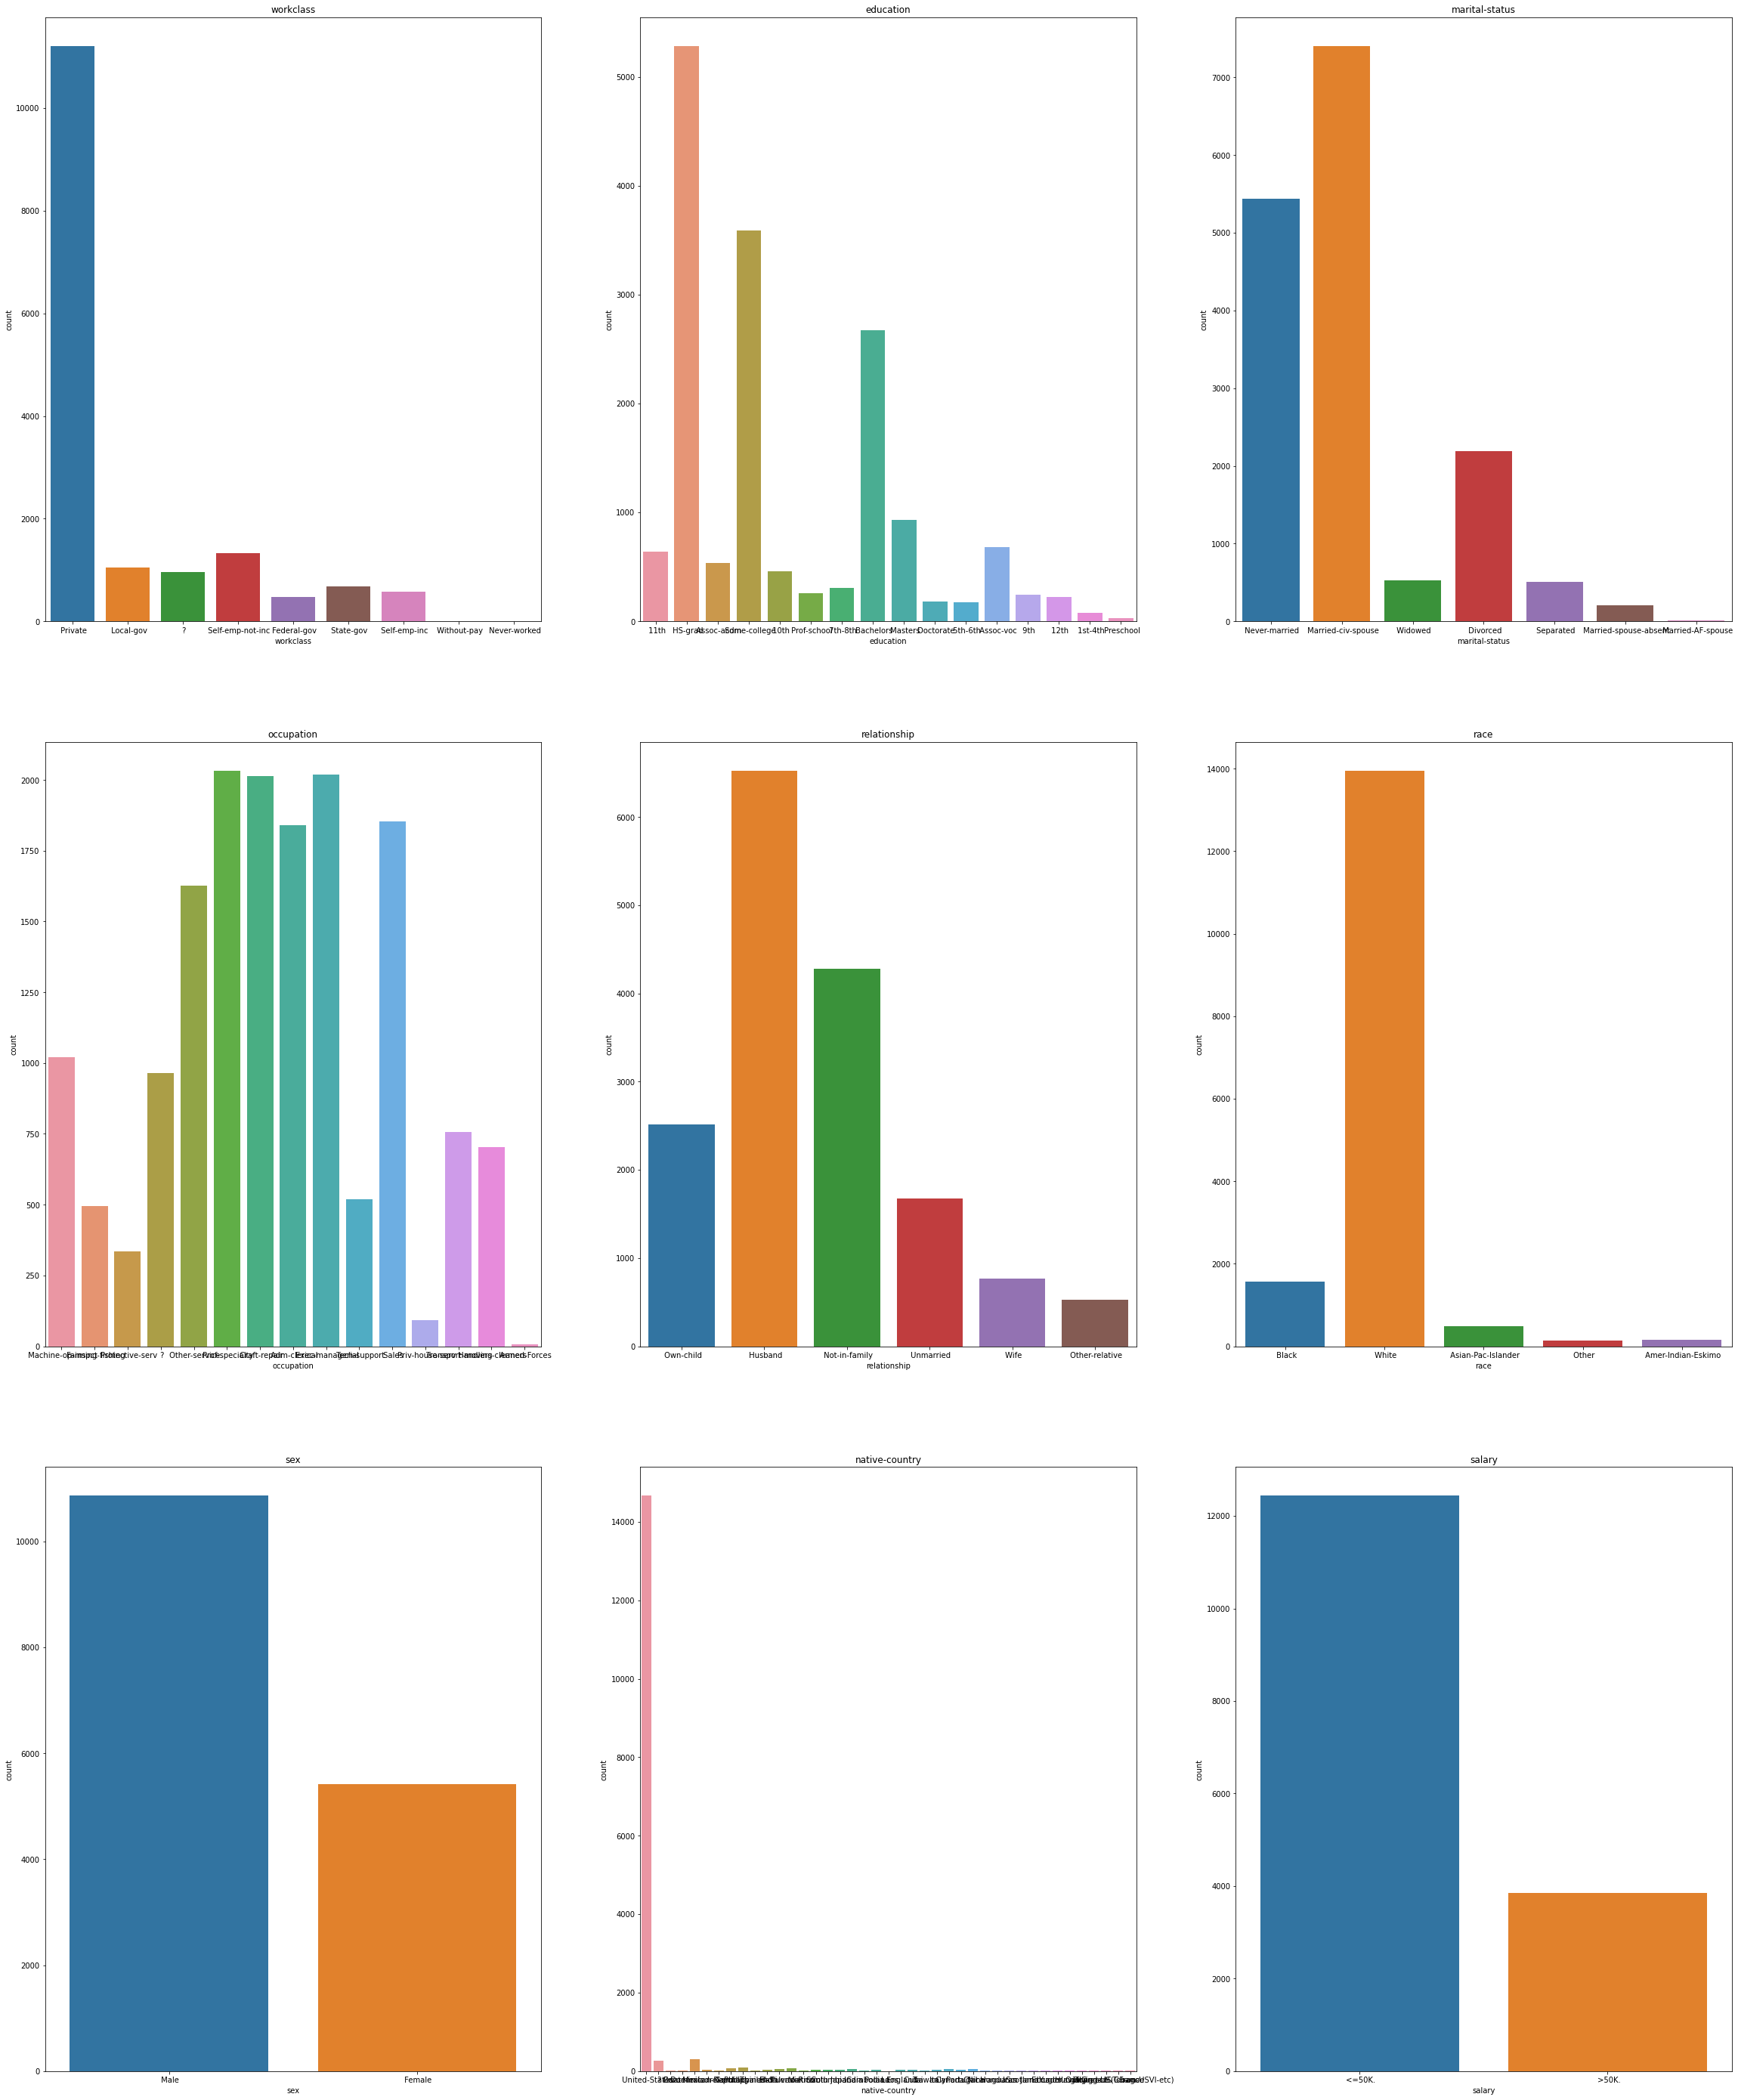

In [14]:
#plotting count values on train data for 'workclass','education','marital-status','occupation','relationship','race','sex','native-country','salary'

plt.figure(figsize=(40,50))

plt.subplot(3,3,1)
plt.title("workclass")
sns.countplot(x='workclass', data=test_df)

plt.subplot(3,3,2)
plt.title("education")
sns.countplot(x='education', data=test_df)

plt.subplot(3,3,3)
plt.title("marital-status")
sns.countplot(x='marital-status', data=test_df)

plt.subplot(3,3,4)
plt.title("occupation")
sns.countplot(x='occupation', data=test_df)

plt.subplot(3,3,5)
plt.title("relationship")
sns.countplot(x='relationship', data=test_df)

plt.subplot(3,3,6)
plt.title("race")
sns.countplot(x='race', data=test_df)

plt.subplot(3,3,7)
plt.title("sex")
sns.countplot(x='sex', data=test_df)

plt.subplot(3,3,8)
plt.title("native-country")
sns.countplot(x='native-country', data=test_df)

plt.subplot(3,3,9)
plt.title("salary")
sns.countplot(x='salary', data=test_df)

plt.show()

In [15]:
# There are some '?' in the data, convert '?' to null values
train_df = train_df.replace(' ?',np.nan)
test_df = test_df.replace(' ?',np.nan)

In [16]:
train_df.isnull().sum()

Age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [17]:
test_df.isnull().sum()

Age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
salary              0
dtype: int64

In [18]:
#removing null values from the data set
train_df.dropna(subset=['workclass', 'occupation', 'native-country'], inplace= True)
test_df.dropna(subset=['workclass', 'occupation', 'native-country'], inplace= True)

In [19]:
train_df.head()

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
test_df.head()

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [20]:
train_df.shape

(30162, 15)

In [21]:
test_df.shape

(15060, 15)

In [22]:
train_df.isnull().sum()

Age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [23]:
test_df.isnull().sum()

Age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [24]:
#converting categorical variables to dummy variables
dummy_columns = pd.get_dummies(train_df[categorical_columns], drop_first=True)
dummy_columns.head()

,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,salary_ >50K
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
#converting categorical variables to dummy variables
dummy_columns_test = pd.get_dummies(test_df[categorical_columns], drop_first=True)
dummy_columns_test.head()

,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,salary_ >50K.
0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  salary          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [27]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15060 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             15060 non-null  int64 
 1   workclass       15060 non-null  object
 2   fnlwgt          15060 non-null  int64 
 3   education       15060 non-null  object
 4   education-num   15060 non-null  int64 
 5   marital-status  15060 non-null  object
 6   occupation      15060 non-null  object
 7   relationship    15060 non-null  object
 8   race            15060 non-null  object
 9   sex             15060 non-null  object
 10  capital-gain    15060 non-null  int64 
 11  capital-loss    15060 non-null  int64 
 12  hours-per-week  15060 non-null  int64 
 13  native-country  15060 non-null  object
 14  salary          15060 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.8+ MB


In [28]:
train_df.corr()

,Age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
Age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education-num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
capital-gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
capital-loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
hours-per-week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


<AxesSubplot:>

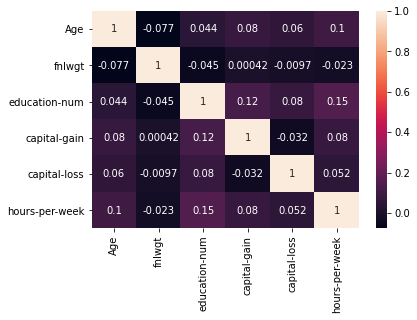

In [29]:
sns.heatmap(train_df.corr(), annot=True)

In [30]:
# merge dummy variables with original columns
train_df = pd.concat([train_df, dummy_columns], axis=1)

In [31]:
# merge dummy variables with original columns
test_df = pd.concat([test_df, dummy_columns_test], axis=1)

In [32]:
train_df.head()

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,salary_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
test_df.head()

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,salary_ >50K.
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [34]:
#drop original columns
train_df.drop(categorical_columns, axis=1, inplace= True)
test_df.drop(categorical_columns, axis=1, inplace= True)

In [35]:
train_df.head()

,Age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,salary_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
test_df.head()

,Age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,salary_ >50K.
0,25,226802,7,0,0,40,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,38,89814,9,0,0,50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,28,336951,12,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,44,160323,10,7688,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5,34,198693,6,0,0,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [37]:
train_df.isnull().sum()

Age                                0
fnlwgt                             0
education-num                      0
capital-gain                       0
capital-loss                       0
                                  ..
native-country_ Trinadad&Tobago    0
native-country_ United-States      0
native-country_ Vietnam            0
native-country_ Yugoslavia         0
salary_ >50K                       0
Length: 97, dtype: int64

In [38]:
test_df.isnull().sum()

Age                                0
fnlwgt                             0
education-num                      0
capital-gain                       0
capital-loss                       0
                                  ..
native-country_ Trinadad&Tobago    0
native-country_ United-States      0
native-country_ Vietnam            0
native-country_ Yugoslavia         0
salary_ >50K.                      0
Length: 96, dtype: int64

In [39]:
num_columns = ['Age', 'fnlwgt', 'education-num', 'capital-gain','capital-loss' ,'hours-per-week']

In [40]:
x_train = train_df.drop(['salary_ >50K'], axis=1)
y_train = train_df['salary_ >50K']

In [41]:
x_test = test_df.drop(['salary_ >50K.'], axis=1)
y_test = test_df['salary_ >50K.']

In [42]:
scaller = StandardScaler()
x_train[num_columns] = scaller.fit_transform(x_train[num_columns])
x_train.head()

,Age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.042796,-1.062722,1.128918,0.146092,-0.218586,-0.077734,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.880288,-1.007871,1.128918,-0.147445,-0.218586,-2.331531,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.033340,0.244693,-0.439738,-0.147445,-0.218586,-0.077734,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1.108695,0.425240,-1.224066,-0.147445,-0.218586,-0.077734,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-0.794697,1.406658,1.128918,-0.147445,-0.218586,-0.077734,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
x_test[num_columns] = scaller.fit_transform(x_test[num_columns])
x_test.head()

,Age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,-1.029005,0.352098,-1.216563,-0.145438,-0.219169,-0.078889,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-0.057423,-0.944995,-0.434898,-0.145438,-0.219169,0.750131,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.804794,1.395062,0.737599,-0.145438,-0.219169,-0.078889,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.391000,-0.277369,-0.044066,0.852624,-0.219169,-0.078889,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,-0.356371,0.085944,-1.607395,-0.145438,-0.219169,-0.907909,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Model Building

In [44]:
# Logistic regression model
logm1 = sm.GLS(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                            GLS Regression Results                            
Dep. Variable:           salary_ >50K   R-squared:                       0.370
Model:                            GLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     186.0
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:25:25   Log-Likelihood:                -10539.
No. Observations:               30162   AIC:                         2.127e+04
Df Residuals:                   30066   BIC:                         2.207e+04
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

## checking VIF

In [45]:
pd.set_option('display.max_rows',100)

In [46]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,education_ Bachelors,1014.49
2,education-num,815.82
26,education_ Some-college,436.60
23,education_ Masters,428.77
22,education_ HS-grad,362.98
25,education_ Prof-school,181.56
21,education_ Doctorate,155.32
18,education_ Assoc-acdm,149.45
93,native-country_ United-States,142.34
19,education_ Assoc-voc,134.63


### Feature selection using RFE

In [47]:
logreg = LogisticRegression()
rfe = RFE(logreg, 50)
rfe = rfe.fit(x_train, y_train)

C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=50 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):


C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

In [48]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Age', True, 1),
 ('fnlwgt', False, 30),
 ('education-num', True, 1),
 ('capital-gain', True, 1),
 ('capital-loss', False, 13),
 ('hours-per-week', True, 1),
 ('workclass_ Local-gov', True, 1),
 ('workclass_ Private', True, 1),
 ('workclass_ Self-emp-inc', False, 11),
 ('workclass_ Self-emp-not-inc', True, 1),
 ('workclass_ State-gov', True, 1),
 ('workclass_ Without-pay', True, 1),
 ('education_ 11th', False, 21),
 ('education_ 12th', False, 34),
 ('education_ 1st-4th', True, 1),
 ('education_ 5th-6th', True, 1),
 ('education_ 7th-8th', False, 42),
 ('education_ 9th', False, 40),
 ('education_ Assoc-acdm', True, 1),
 ('education_ Assoc-voc', False, 24),
 ('education_ Bachelors', False, 33),
 ('education_ Doctorate', False, 44),
 ('education_ HS-grad', False, 35),
 ('education_ Masters', False, 37),
 ('education_ Preschool', True, 1),
 ('education_ Prof-school', True, 1),
 ('education_ Some-college', False, 38),
 ('marital-status_ Married-AF-spouse', True, 1),
 ('marital-status_ Marr

In [49]:
col = x_train.columns[rfe.support_]

In [51]:
x_train_sm = sm.add_constant(x_train[col])
logreg2 = sm.GLS(y_train, x_train_sm, family=sm.families.Binomial())
res =logreg2.fit()
print(res.summary())

                            GLS Regression Results                            
Dep. Variable:           salary_ >50K   R-squared:                       0.356
Model:                            GLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     332.9
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:28:48   Log-Likelihood:                -10873.
No. Observations:               30162   AIC:                         2.185e+04
Df Residuals:                   30111   BIC:                         2.227e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [52]:
rfe1 = RFE(logreg, 30)
rfe1 = rfe1.fit(x_train, y_train)

C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=30 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):


C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

In [53]:
list(zip(x_train.columns, rfe1.support_, rfe1.ranking_))

[('Age', False, 15),
 ('fnlwgt', False, 50),
 ('education-num', True, 1),
 ('capital-gain', True, 1),
 ('capital-loss', False, 33),
 ('hours-per-week', False, 13),
 ('workclass_ Local-gov', False, 19),
 ('workclass_ Private', False, 20),
 ('workclass_ Self-emp-inc', False, 31),
 ('workclass_ Self-emp-not-inc', False, 12),
 ('workclass_ State-gov', False, 18),
 ('workclass_ Without-pay', True, 1),
 ('education_ 11th', False, 41),
 ('education_ 12th', False, 54),
 ('education_ 1st-4th', True, 1),
 ('education_ 5th-6th', True, 1),
 ('education_ 7th-8th', False, 62),
 ('education_ 9th', False, 60),
 ('education_ Assoc-acdm', False, 16),
 ('education_ Assoc-voc', False, 44),
 ('education_ Bachelors', False, 53),
 ('education_ Doctorate', False, 64),
 ('education_ HS-grad', False, 55),
 ('education_ Masters', False, 57),
 ('education_ Preschool', True, 1),
 ('education_ Prof-school', False, 21),
 ('education_ Some-college', False, 58),
 ('marital-status_ Married-AF-spouse', True, 1),
 ('mari

In [54]:
col1 = x_train.columns[rfe1.support_]

In [55]:
x_train_sm = sm.add_constant(x_train[col1])
logreg2 = sm.GLS(y_train, x_train_sm, family=sm.families.Binomial())
res =logreg2.fit()
print(res.summary())

                            GLS Regression Results                            
Dep. Variable:           salary_ >50K   R-squared:                       0.335
Model:                            GLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     505.6
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:30:03   Log-Likelihood:                -11360.
No. Observations:               30162   AIC:                         2.278e+04
Df Residuals:                   30131   BIC:                         2.304e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [56]:
rfe2 = RFE(logreg, 20)
rfe2 = rfe2.fit(x_train, y_train)
list(zip(x_train.columns, rfe1.support_, rfe1.ranking_))

C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):


C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

[('Age', False, 15),
 ('fnlwgt', False, 50),
 ('education-num', True, 1),
 ('capital-gain', True, 1),
 ('capital-loss', False, 33),
 ('hours-per-week', False, 13),
 ('workclass_ Local-gov', False, 19),
 ('workclass_ Private', False, 20),
 ('workclass_ Self-emp-inc', False, 31),
 ('workclass_ Self-emp-not-inc', False, 12),
 ('workclass_ State-gov', False, 18),
 ('workclass_ Without-pay', True, 1),
 ('education_ 11th', False, 41),
 ('education_ 12th', False, 54),
 ('education_ 1st-4th', True, 1),
 ('education_ 5th-6th', True, 1),
 ('education_ 7th-8th', False, 62),
 ('education_ 9th', False, 60),
 ('education_ Assoc-acdm', False, 16),
 ('education_ Assoc-voc', False, 44),
 ('education_ Bachelors', False, 53),
 ('education_ Doctorate', False, 64),
 ('education_ HS-grad', False, 55),
 ('education_ Masters', False, 57),
 ('education_ Preschool', True, 1),
 ('education_ Prof-school', False, 21),
 ('education_ Some-college', False, 58),
 ('marital-status_ Married-AF-spouse', True, 1),
 ('mari

In [57]:
col2 = x_train.columns[rfe2.support_]
x_train_sm = sm.add_constant(x_train[col2])
logreg2 = sm.GLS(y_train, x_train_sm, family=sm.families.Binomial())
res =logreg2.fit()
print(res.summary())

                            GLS Regression Results                            
Dep. Variable:           salary_ >50K   R-squared:                       0.324
Model:                            GLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     723.4
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:31:15   Log-Likelihood:                -11597.
No. Observations:               30162   AIC:                         2.324e+04
Df Residuals:                   30141   BIC:                         2.341e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [58]:
vif = pd.DataFrame()
vif['Features'] = x_train[col2].columns
vif['VIF'] = [variance_inflation_factor(x_train[col2].values, i) for i in range(x_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,sex_ Male,4.36
6,marital-status_ Married-civ-spouse,4.03
7,marital-status_ Never-married,2.27
13,relationship_ Own-child,1.63
14,relationship_ Wife,1.41
0,education-num,1.20
10,occupation_ Other-service,1.17
9,occupation_ Handlers-cleaners,1.12
12,relationship_ Other-relative,1.08
8,occupation_ Farming-fishing,1.07


In [59]:
col2 = col2.drop('occupation_ Priv-house-serv',1)

In [60]:
x_train_sm = sm.add_constant(x_train[col2])
logreg2 = sm.GLS(y_train, x_train_sm, family=sm.families.Binomial())
res =logreg2.fit()
print(res.summary())

                            GLS Regression Results                            
Dep. Variable:           salary_ >50K   R-squared:                       0.324
Model:                            GLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     761.5
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:32:58   Log-Likelihood:                -11597.
No. Observations:               30162   AIC:                         2.323e+04
Df Residuals:                   30142   BIC:                         2.340e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [61]:
col2 = col2.drop('native-country_ Dominican-Republic',1)

In [62]:
x_train_sm = sm.add_constant(x_train[col2])
logreg2 = sm.GLS(y_train, x_train_sm, family=sm.families.Binomial())
res =logreg2.fit()
print(res.summary())

                            GLS Regression Results                            
Dep. Variable:           salary_ >50K   R-squared:                       0.324
Model:                            GLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     803.7
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:33:20   Log-Likelihood:                -11597.
No. Observations:               30162   AIC:                         2.323e+04
Df Residuals:                   30143   BIC:                         2.339e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [63]:
col2 = col2.drop('relationship_ Other-relative',1)

In [65]:
x_train_sm = sm.add_constant(x_train[col2])
logreg2 = sm.GLS(y_train, x_train_sm, family=sm.families.Binomial())
res =logreg2.fit()
print(res.summary())

                            GLS Regression Results                            
Dep. Variable:           salary_ >50K   R-squared:                       0.324
Model:                            GLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     850.9
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:34:03   Log-Likelihood:                -11598.
No. Observations:               30162   AIC:                         2.323e+04
Df Residuals:                   30144   BIC:                         2.338e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [66]:
vif = pd.DataFrame()
vif['Features'] = x_train[col2].columns
vif['VIF'] = [variance_inflation_factor(x_train[col2].values, i) for i in range(x_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,sex_ Male,4.35
6,marital-status_ Married-civ-spouse,4.02
7,marital-status_ Never-married,2.19
11,relationship_ Own-child,1.59
12,relationship_ Wife,1.41
0,education-num,1.18
10,occupation_ Other-service,1.17
9,occupation_ Handlers-cleaners,1.11
8,occupation_ Farming-fishing,1.07
3,education_ 1st-4th,1.06


In [67]:
col2 = col2.drop('native-country_ Outlying-US(Guam-USVI-etc)',1)
x_train_sm = sm.add_constant(x_train[col2])
logreg2 = sm.GLS(y_train, x_train_sm, family=sm.families.Binomial())
res =logreg2.fit()
print(res.summary())

                            GLS Regression Results                            
Dep. Variable:           salary_ >50K   R-squared:                       0.324
Model:                            GLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     903.8
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:34:54   Log-Likelihood:                -11600.
No. Observations:               30162   AIC:                         2.323e+04
Df Residuals:                   30145   BIC:                         2.337e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [68]:
vif = pd.DataFrame()
vif['Features'] = x_train[col2].columns
vif['VIF'] = [variance_inflation_factor(x_train[col2].values, i) for i in range(x_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,sex_ Male,4.35
6,marital-status_ Married-civ-spouse,4.02
7,marital-status_ Never-married,2.19
11,relationship_ Own-child,1.59
12,relationship_ Wife,1.41
0,education-num,1.18
10,occupation_ Other-service,1.17
9,occupation_ Handlers-cleaners,1.11
8,occupation_ Farming-fishing,1.07
3,education_ 1st-4th,1.06


## Predit Model on y-Train

In [100]:
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

0    0.265522
1    0.571647
2    0.034012
3    0.209456
4    0.605617
5    0.652640
6   -0.202500
7    0.383553
8    0.343937
9    0.616296
dtype: float64

### creating a data frame with the actual churn flag and the predicted probabilities:

In [101]:
y_train_pred_final = pd.DataFrame({'50K': y_train.values, '50K_prob': y_train_pred})
y_train_pred_final.head()

,50K,50K_prob
0,0,0.265522
1,0,0.571647
2,0,0.034012
3,0,0.209456
4,0,0.605617


In [102]:
# creating new column 'predicted' with 1 if churn_prob >0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final['50K_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,50K,50K_prob,predicted
0,0,0.265522,0
1,0,0.571647,1
2,0,0.034012,0
3,0,0.209456,0
4,0,0.605617,1


In [103]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final['50K'], y_train_pred_final['predicted'])
confusion

array([[21340,  1314],
       [ 3974,  3534]], dtype=int64)

In [104]:
#lets check the accuracy of the model
print("Accuracy of the model: ",metrics.accuracy_score(y_train_pred_final['50K'], y_train_pred_final['predicted']))

Accuracy of the model:  0.8246800610039122


In [105]:
# Metrics beyond simply accuracy

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [106]:
#lets check the Sensitivity of the our model
TP/float(TP+FN)

0.47069792221630263

In [107]:
#lets check the Specificity of the our model
TN / float(TN+FP)

0.941996998322592

## Plotting ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [108]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [109]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['50K'], y_train_pred_final['50K_prob'], drop_intermediate = False )

In [1]:
draw_roc(y_train_pred_final['50K'], y_train_pred_final['50K_prob'])

NameError: name 'draw_roc' is not defined

## Finding optimal cutoff point

In [111]:
#lets create columsn with diffrent probability cutoffs
numbers = [float(i)/10 for i in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final['50K_prob'].map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,50K,50K_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.265522,0,1,1,1,0,0,0,0,0,0,0
1,0,0.571647,1,1,1,1,1,1,1,0,0,0,0
2,0,0.034012,0,1,0,0,0,0,0,0,0,0,0
3,0,0.209456,0,1,1,1,0,0,0,0,0,0,0
4,0,0.605617,1,1,1,1,1,1,1,1,0,0,0


In [112]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [float(i)/10 for i in range(10)]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['50K'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.400471  0.995205  0.203364
0.1   0.1  0.579172  0.978823  0.446720
0.2   0.2  0.688747  0.939931  0.605500
0.3   0.3  0.752868  0.880261  0.710647
0.4   0.4  0.813507  0.687001  0.855434
0.5   0.5  0.824680  0.470698  0.941997
0.6   0.6  0.799881  0.248269  0.982696
0.7   0.7  0.769876  0.081247  0.998102
0.8   0.8  0.757112  0.024374  0.999956
0.9   0.9  0.755852  0.019180  1.000000


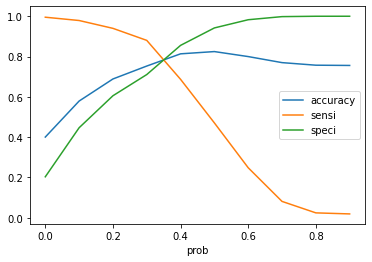

In [113]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [114]:
y_train_pred_final['final_predicted'] = y_train_pred_final['50K_prob'].map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,50K,50K_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.265522,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.571647,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.034012,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.209456,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.605617,1,1,1,1,1,1,1,1,0,0,0,1


In [115]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final['50K'], y_train_pred_final.final_predicted)

0.7702407002188184

In [117]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final['50K'], y_train_pred_final['final_predicted'])
confusion

array([[16927,  5727],
       [ 1203,  6305]], dtype=int64)

In [118]:
confusion2 = metrics.confusion_matrix(y_train_pred_final['50K'], y_train_pred_final.final_predicted )
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

# Let's see the sensitivity of our logistic regression model
print("sensitivity:",TP / float(TP+FN))

# Let us calculate specificity
print("specificity:",TN / float(TN+FP))

sensitivity: 0.8397709110282365
specificity: 0.7471969630087402


## Making predictions on the test set

In [119]:
x_test_sm = sm.add_constant(x_test[col2])

In [120]:
y_test_pred = res.predict(x_test_sm)
y_test_pred[:10]

0    -0.062624
1     0.261161
2     0.524853
3     0.494864
5    -0.138363
7     0.691170
8    -0.022214
9     0.149942
10    0.437471
11    0.571716
dtype: float64

In [121]:
# Converting y_pred to a dataframe which is an array
y_test_pred_final = pd.DataFrame({'50K': y_test.values, '50K_prob': y_test_pred})
y_test_pred_final.head()

,50K,50K_prob
0,0,-0.062624
1,0,0.261161
2,1,0.524853
3,1,0.494864
5,0,-0.138363


In [122]:
y_test_pred_final['predicted'] = y_test_pred_final['50K_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,50K,50K_prob,predicted
0,0,-0.062624,0
1,0,0.261161,0
2,1,0.524853,1
3,1,0.494864,0
5,0,-0.138363,0


In [123]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final['50K'], y_test_pred_final.predicted)

0.8262948207171315

In [124]:
confusion2 = metrics.confusion_matrix(y_train_pred_final['50K'], y_train_pred_final.predicted )
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

# Let's see the sensitivity of our logistic regression model
print("sensitivity:",TP / float(TP+FN))

# Let us calculate specificity
print("specificity:",TN / float(TN+FP))

sensitivity: 0.47069792221630263
specificity: 0.941996998322592


In [125]:
y_test_pred_final['final_predicted'] = y_test_pred_final['50K_prob'].map(lambda x: 1 if x > 0.35 else 0)
y_test_pred_final.head()

,50K,50K_prob,predicted,final_predicted
0,0,-0.062624,0,0
1,0,0.261161,0,0
2,1,0.524853,1,1
3,1,0.494864,0,1
5,0,-0.138363,0,0


In [126]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final['50K'], y_test_pred_final.final_predicted)

0.7749667994687915

In [128]:
confusion3 = metrics.confusion_matrix(y_train_pred_final['50K'], y_train_pred_final.final_predicted )
TP = confusion3[1,1]
TN = confusion3[0,0]
FP = confusion3[0,1]
FN = confusion3[1,0]

# Let's see the sensitivity of our logistic regression model
print("sensitivity:",TP / float(TP+FN))

# Let us calculate specificity
print("specificity:",TN / float(TN+FP))

sensitivity: 0.8397709110282365
specificity: 0.7471969630087402


In [129]:
col2

Index(['education-num', 'capital-gain', 'workclass_ Without-pay',
       'education_ 1st-4th', 'education_ Preschool',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse', 'marital-status_ Never-married',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Other-service', 'relationship_ Own-child',
       'relationship_ Wife', 'sex_ Male', 'native-country_ Columbia',
       'native-country_ Vietnam'],
      dtype='object')

Below are the list of features to >=50K salary

* education-num
* capital-gain
* education_ 1st-4th
* marital-status_ Married-AF-spouse
* marital-status_ Married-civ-spouse
* marital-status_ Never-married
* occupation_ Farming-fishing
* occupation_ Handlers-cleaners
* occupation_ Other-service
* occupation_ Priv-house-serv
* relationship_ Other-relative
* relationship_ Own-child
* relationship_ Wife
* sex_ Male
* native-country_ Columbia
* native-country_ Dominican-Republic
* native-country_ Vietnam

The accuracy of the model is 0.836 on train data with cut-off paint is 0.5 \
The accuracy of the model is 0.782 on train data with cut-off paint is 0.3(considering sensitivity,specificity)

The accuracy of the model is 0.837 on test data with cut-off paint is 0.5 \
The accuracy of the model is 0.784 on test data with cut-off paint is 0.3(considering sensitivity,specificity)